MODELISATION

Description of the building
notes:
Pour les surfaces des murs, les premiers calculs ont été fait en considérant que les longueures correspondent aux longueurs exterieurs.  

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from modélisationV6 import *
from Data_Collection import *


Definition of thermo-physicals properties (we have kept the same value as the course) 

In [2]:
pd.DataFrame([{'in': 8., 'out': 25}], index=['h'])  # W/(m²⋅K)

,in,out
h,8.0,25


Computation of thermal conductance of conduction

In [3]:
pd.DataFrame.from_dict({'Conduction':G_cd})

,Conduction
mur bas béton,672.000
mur bas isolant,32.400
mur haut béton,350.000
mur haut isolant,16.875
mur intérieur horizontal,210.000
mur intérieur vertical,168.000
vitre,140.000


Computation of thermal conductance of convection

In [4]:
pd.DataFrame.from_dict({'Conduction':G_conv})

,Conduction
mur bas exterieur,2400.0000
mur bas intérieur,768.0000
mur haut exterieur,1250.0000
mur haut interieur,400.0000
mur intérieur horizontal,240.0000
mur intérieur vertical,192.0000
porte exterieur,37.2300
porte intérieur,11.9136
vitre exterieur,100.0000
vitre interieur,32.0000


Computation of thermal capacities

In [5]:
pd.DataFrame.from_dict({'Thermal capacity':C_thermal})

,Thermal capacity
mur bas béton,38860800.0
mur bas isolant,511104.0
mur haut béton,20240000.0
mur haut isolant,266200.0
mur intérieur horizontal,12144000.0
mur intérieur vertical,9715200.0
vitre,484000.0


Computation of thermal conductance of advection
Hypothesis: windows closed, front bottom door open, lateral doors open, middle top door (closed or open)

In [6]:
pd.DataFrame.from_dict({'Conduction':G_adv})

,Conduction
Advection bas,75.0384
Advection entre haut,10.0000
Advection haut,76.1192


STEADY STATE

The steady state code can be found in the file Steady_state.py. The code returns the temperature of the three rooms at steady state.

In [ ]:
%run Steady_state.py

STEP RESPONSE

In [ ]:
%run Step_Response.py

WEATHER DATA COLLECTION

Creation of a year's data by extracting randomly date from different months: 

In [7]:
pd.DataFrame(unique_month_years, columns=['Month-Year'])

,Month-Year
0,01-2015
1,02-2011
2,03-2011
3,04-2015
4,05-2012
5,06-2012
6,07-2009
7,08-2015
8,09-2014
9,10-2011


After renaming this created year by 2020, we can choose the time bounds of our study in order to plot the outdoor temperature and solar radiation over this period: 

                           temp_air  dir_n_rad  dif_h_rad
2020-07-28 08:00:00+01:00      20.7        635        128
2020-07-28 09:00:00+01:00      21.6        584        187
2020-07-28 10:00:00+01:00      22.3        603        212
2020-07-28 11:00:00+01:00      23.8        697        196
2020-07-28 12:00:00+01:00      25.2        775        175
...                             ...        ...        ...
2020-08-15 14:00:00+01:00      19.4         84        191
2020-08-15 15:00:00+01:00      19.3        105        149
2020-08-15 16:00:00+01:00      18.7        102        125
2020-08-15 17:00:00+01:00      18.3        100         83
2020-08-15 18:00:00+01:00      17.9         52         36

[443 rows x 3 columns]


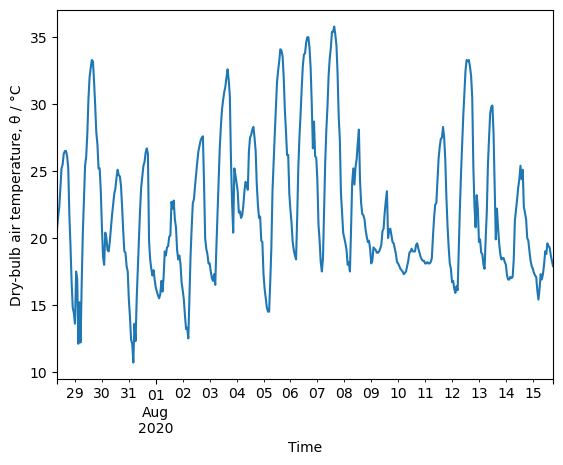

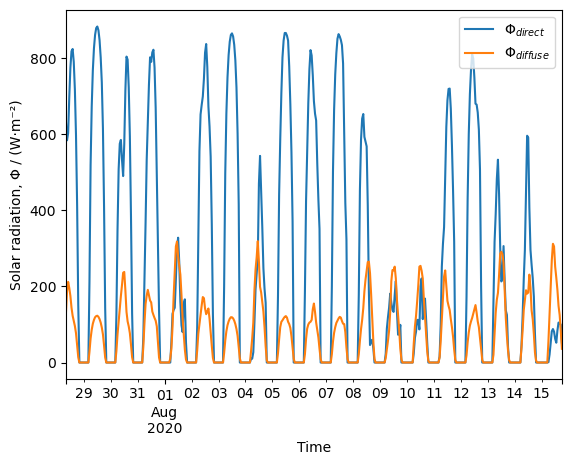

In [15]:
from Data_Collection import *
#It is neccesary to import the file every time in order to actualize the table weather_data correcty
start_date = '2020-07-28 08:00'
end_date = '2020-08-15 18:00'
weather_data = weather_data.loc[start_date:end_date]
print(weather_data)

weather_data['temp_air'].plot()
plt.xlabel("Time")
plt.ylabel("Dry-bulb air temperature, θ / °C")
plt.show()

weather_data[['dir_n_rad', 'dif_h_rad']].plot()
plt.xlabel("Time")
plt.ylabel("Solar radiation, Φ / (W·m⁻²)")
plt.legend(['$Φ_{direct}$', '$Φ_{diffuse}$'])
plt.show()

Calculation of solar radiation on a tilted surface

NB: This part has not been analyzed and is not added to the study.

As a reminder, here is the description of the parameter angles used:

β: slope between 0 and 180° (0 Horiz,upward / 90 Verti / 180 Horiz,downward)
γ: azimuth between -180 and 180° (0 South / Westward >0 / Eastward <0)
ϕ: latitude between -90 and 90 (northward >0 / Southward <0) 

We can create four variables for each wall to set uo angles for all of them:

In [ ]:
#Walls
WallN={'slope': 90, 'azimuth': 180, 'latitude': 45}
WallE={'slope': 90, 'azimuth': -90, 'latitude': 45}
WallW={'slope': 90, 'azimuth': 90, 'latitude': 45}
WallS={'slope': 90, 'azimuth': 0, 'latitude': 45}

By changing the wall considered, we can plot solar radiations on this wall during the year of study:

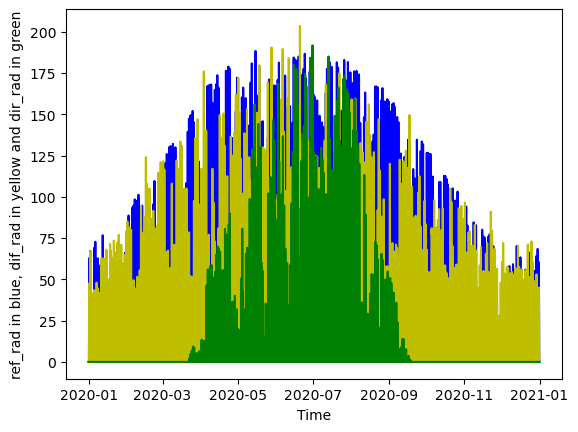

In [18]:
#As previously, we run the file again to actualize the data
from Data_Collection import *

#Chosen Wall
surface_orientation=WallN

#Plot
fig, ax = plt.subplots()
ax.plot(weather_data.index,ref_rad,"b")
ax.plot(weather_data.index,dif_rad,"y")
ax.plot(weather_data.index,dir_rad,"g")

plt.xlabel('Time')
plt.ylabel('ref_rad in blue, dif_rad in yellow and dir_rad in green')
plt.show() 